## Boxplots

################################################################################
Processing: qian_adata


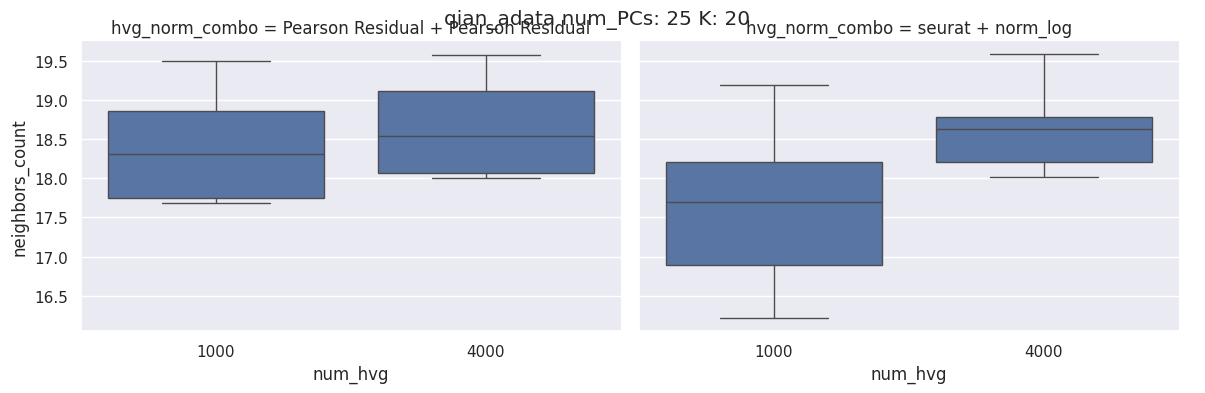

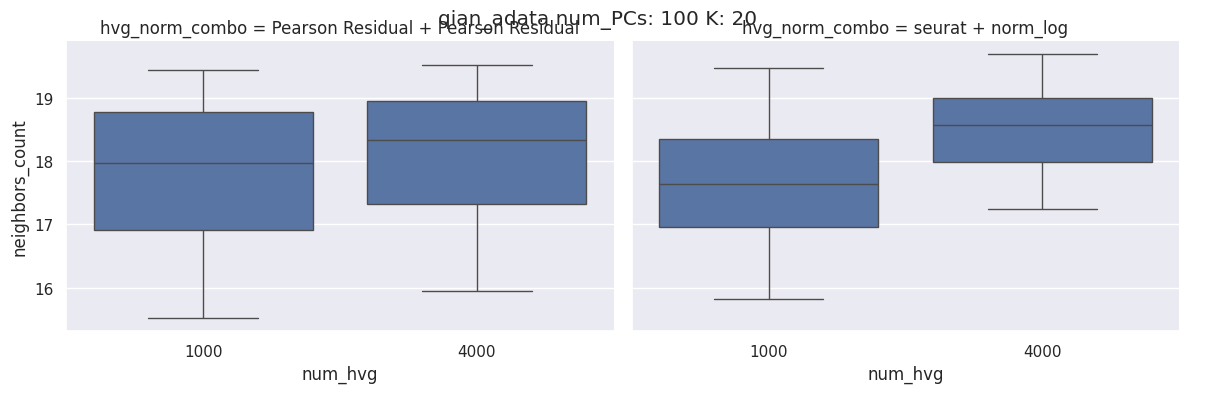

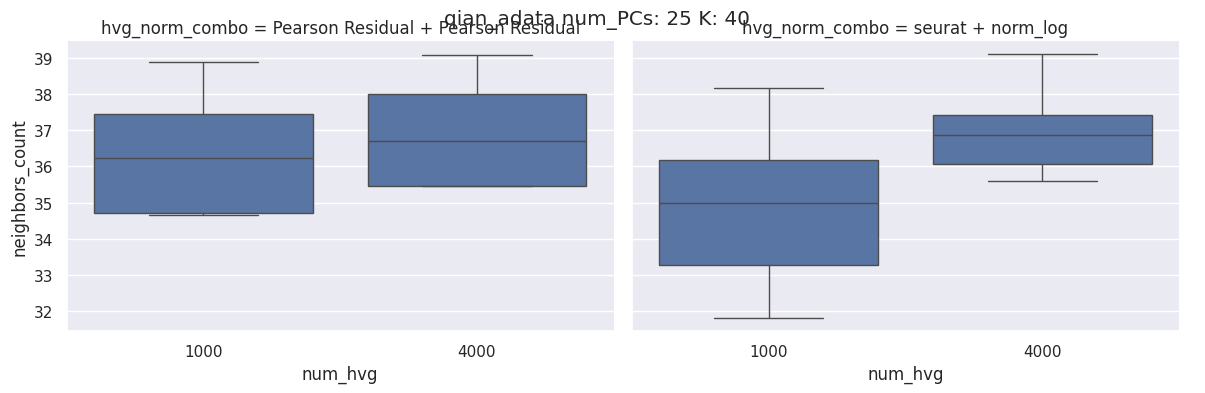

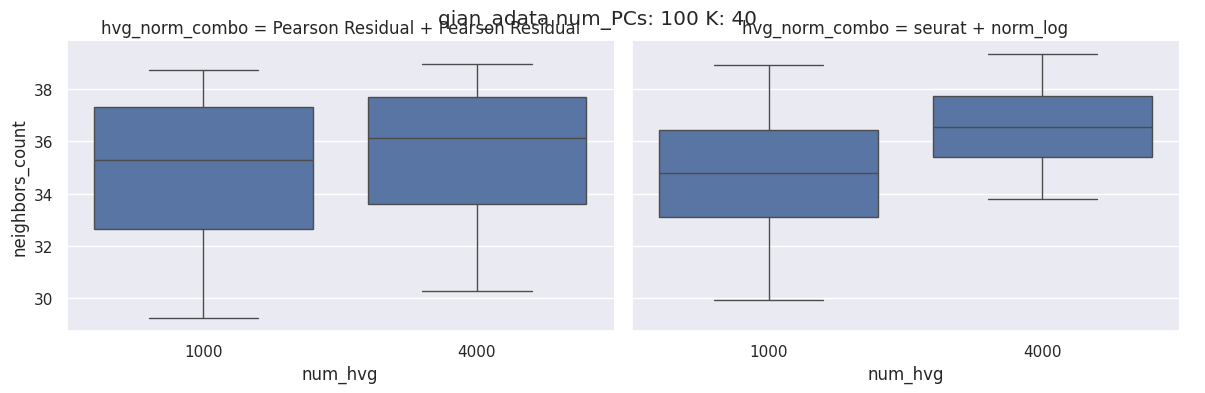

In [4]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="darkgrid")

# Get all the aggregated results file paths and sort them alphabetically
files = sorted(glob.glob("/Genomics/pritykinlab/yujie/preprocessing_benchmarking/test/qian_adata/aggregated_results.tsv"))


# Datasets to exclude
exclude_datasets = ['DixitRegev2016', 'TianKampmann2019_day7neuron', 'XieHon2017']

# Loop through each aggregated results file
for file_ in files:
    dataset_name = file_.split('/')[-2]
    # Only process if dataset_name not in exclude_datasets
    if dataset_name not in exclude_datasets:
        print("################################################################################")
        print(f"Processing: {dataset_name}")
        results_df = pd.read_csv(file_, sep='\t')
    
        # Filter DataFrame for unique combinations of num_PCs and num_nn
        combinations = results_df[['num_pcs', 'num_nn']].drop_duplicates()
    
        # Loop through each combination
        for _, row in combinations.iterrows():
            num_pcs = row['num_pcs']
            num_nn = row['num_nn']
            
            # Filter DataFrame based on the current combination
            df_comb = results_df[(results_df['num_pcs'] == num_pcs) &
                                 (results_df['num_nn'] == num_nn)]
            
            # Use catplot to create a FacetGrid of boxplots
            g = sns.catplot(x="num_hvg", y="neighbors_count", col="hvg_norm_combo",
                            col_wrap=2, sharex=False, sharey=True, showfliers=False,
                            kind="box", data=df_comb, height=4, aspect=1.5)
            
            g.fig.subplots_adjust(top=0.9)  # adjust the Figure top
            g.fig.suptitle(f'{dataset_name} num_PCs: {num_pcs} K: {num_nn}')
    
            plt.show()
